<a href="https://colab.research.google.com/github/ThanhQuyen1/ML/blob/main/Lab_10_21130508_NguyenThanhQuyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [18]:
# code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [19]:
#code
dataset = datasets.load_iris()

In [20]:
X = dataset.data
y = dataset.target

In [21]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# cross_validate
clf = svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9


In [23]:
# cross_val_score
# prepare the cross-validation procedure
cV = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = svm.SVC(kernel='rbf', random_state=0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cV)
svm_mean_score = scores.mean()
print(svm_mean_score)

0.9666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [24]:
#code
# Select top 2 features using ANOVA F-test
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_validate(rf_model, X, y, scoring='accuracy', cv=10)
print(sorted(rf_scores.keys()))
print(np.mean(rf_scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9533333333333334


In [26]:
# Define the Random Forest model
cV = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# evaluate model
rf_scores = cross_val_score(rf_model, X_new, y, scoring='accuracy', cv=cV)
rf_mean_score = rf_scores.mean()
print(rf_mean_score)

0.9466666666666667


In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(knn_scores.keys()))
print(np.mean(knn_scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9


In [28]:
# Define the kNN model
cV = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
knn_model = KNeighborsClassifier(n_neighbors=5)
# evaluate model
knn_scores = cross_val_score(knn_model, X_new, y, scoring='accuracy', cv=cV)
knn_mean_score = knn_scores.mean()
print(knn_mean_score)

0.9666666666666668


*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [29]:
#code

table = PrettyTable()
table.field_names = ['ALGORITHM', 'SCORE']
table.add_row(['SVM', svm_mean_score])
table.add_row(['Knn', knn_mean_score])
table.add_row(['Random Forest', rf_mean_score])
print(table)

+---------------+--------------------+
|   ALGORITHM   |       SCORE        |
+---------------+--------------------+
|      SVM      | 0.9666666666666668 |
|      Knn      | 0.9666666666666668 |
| Random Forest | 0.9466666666666667 |
+---------------+--------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [31]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [32]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [33]:
# Use a subset of the data for quicker computation
X, y = X_train[:10000], y_train[:10000]

In [34]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# Apply K-Means with k=10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.14051314451141012


In [37]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

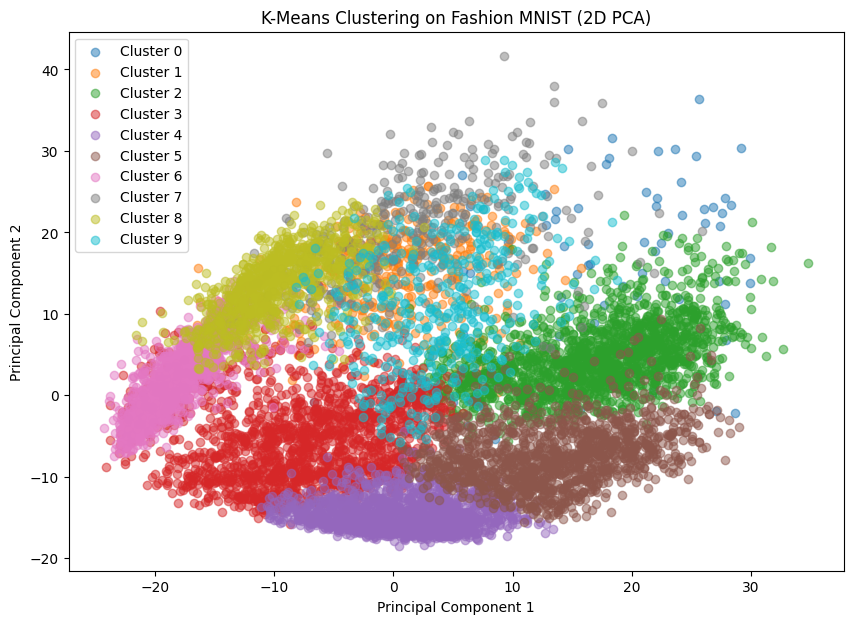

In [38]:
# Plot the clusters
plt.figure(figsize=(10, 7))
for i in range(10):
    cluster = X_pca[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('K-Means Clustering on Fashion MNIST (2D PCA)')
plt.show()

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [39]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [40]:
# code
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)

In [41]:
svm_scores = cross_validate(svm_model, X, y, cv=5, scoring=scoring)
svm_results = {metric: svm_scores[f'test_{metric}'].mean() for metric in scoring}

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
rf_scores = cross_validate(rf_model, X, y, cv=5, scoring=scoring)
rf_results = {metric: rf_scores[f'test_{metric}'].mean() for metric in scoring}

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [45]:
knn_scores = cross_validate(knn_model, X, y, cv=5, scoring=scoring)
knn_results = {metric: knn_scores[f'test_{metric}'].mean() for metric in scoring}


In [46]:
table = PrettyTable()
table.field_names = ['ALGORITHM', 'ACC','PRE','RECALL', 'F1']
table.add_row(["SVM", svm_results['accuracy'], svm_results['precision_macro'], svm_results['recall_macro'], svm_results['f1_macro']])
table.add_row(["Random Forest", rf_results['accuracy'], rf_results['precision_macro'], rf_results['recall_macro'], rf_results['f1_macro']])
table.add_row(["kNN", knn_results['accuracy'], knn_results['precision_macro'], knn_results['recall_macro'], knn_results['f1_macro']])
print(table)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   ALGORITHM   |        ACC         |        PRE         |       RECALL       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|      SVM      | 0.8100000000000002 | 0.810101542001228  | 0.8097915151039647 | 0.8087225789029715 |
| Random Forest |       0.8557       | 0.8539003004573088 | 0.8558025689967218 | 0.8535708743566127 |
|      kNN      |       0.8208       | 0.8248124065695116 | 0.8207371022352989 | 0.8201659282530184 |
+---------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [55]:
#code
table = PrettyTable()
table.field_names = ['ALGORITHM', 'ACC','PRE','RECALL', 'F1']
table.add_row(["SVM", svm_results['accuracy'], svm_results['precision_macro'], svm_results['recall_macro'], svm_results['f1_macro']])
table.add_row(["Random Forest", rf_results['accuracy'], rf_results['precision_macro'], rf_results['recall_macro'], rf_results['f1_macro']])
table.add_row(["kNN", knn_results['accuracy'], knn_results['precision_macro'], knn_results['recall_macro'], knn_results['f1_macro']])
print(table)

table = PrettyTable()
table.field_names = ['ALGORITHM', 'Score']
table.add_row(["Clustering", silhouette_avg])
print(table)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   ALGORITHM   |        ACC         |        PRE         |       RECALL       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|      SVM      | 0.8100000000000002 | 0.810101542001228  | 0.8097915151039647 | 0.8087225789029715 |
| Random Forest |       0.8557       | 0.8539003004573088 | 0.8558025689967218 | 0.8535708743566127 |
|      kNN      |       0.8208       | 0.8248124065695116 | 0.8207371022352989 | 0.8201659282530184 |
+---------------+--------------------+--------------------+--------------------+--------------------+
+------------+---------------------+
| ALGORITHM  |        Score        |
+------------+---------------------+
| Clustering | 0.14051314451141012 |
+------------+---------------------+


2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [56]:
#code
from sklearn.cluster import AgglomerativeClustering

In [57]:
agg_clustering = AgglomerativeClustering(n_clusters=10)

In [58]:
agg_labels = agg_clustering.fit_predict(X)

In [59]:
agg_silhouette_avg = silhouette_score(X, agg_labels)
print(f'Silhouette Score: {agg_silhouette_avg}')

Silhouette Score: 0.10745840581517603


#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
#code
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
%cd '/content/gdrive/MyDrive/dataLab10'

/content/gdrive/MyDrive/dataLab10


In [51]:
# code
fashion = pd.read_csv('shopping-data.csv')

In [60]:
fashion = fashion.drop(columns=['CustomerID', 'Genre'])

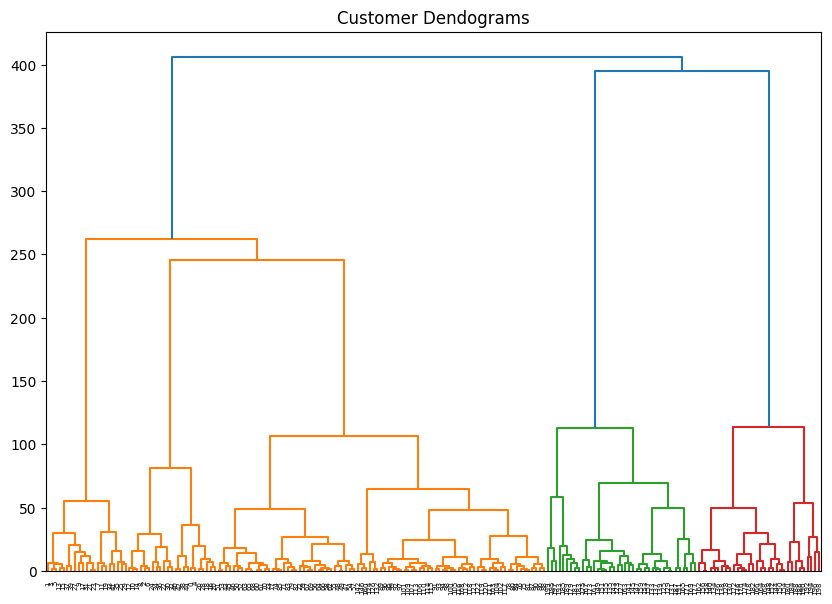

In [67]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(fashion.iloc[:, 1:4], method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [69]:
#code
sse = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(fashion)
 sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

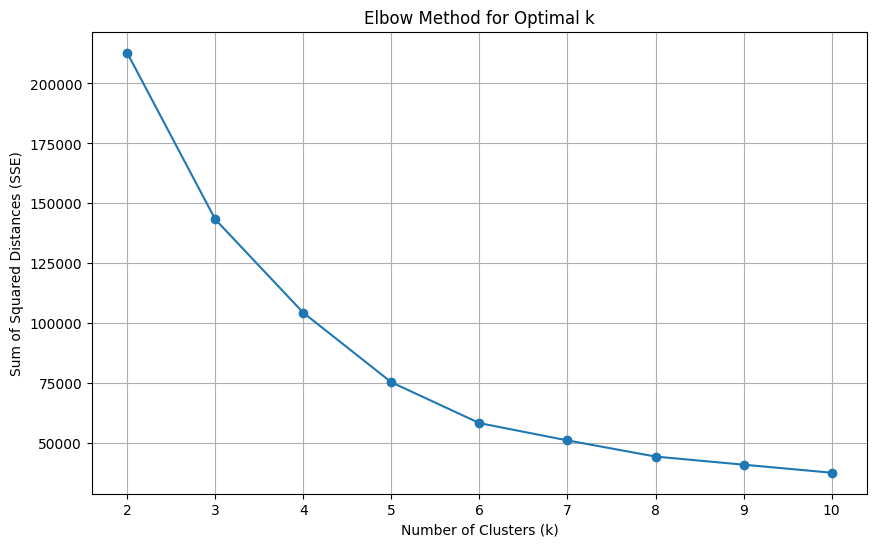

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [72]:
#code
linkage_matrix = linkage(fashion, method='ward')

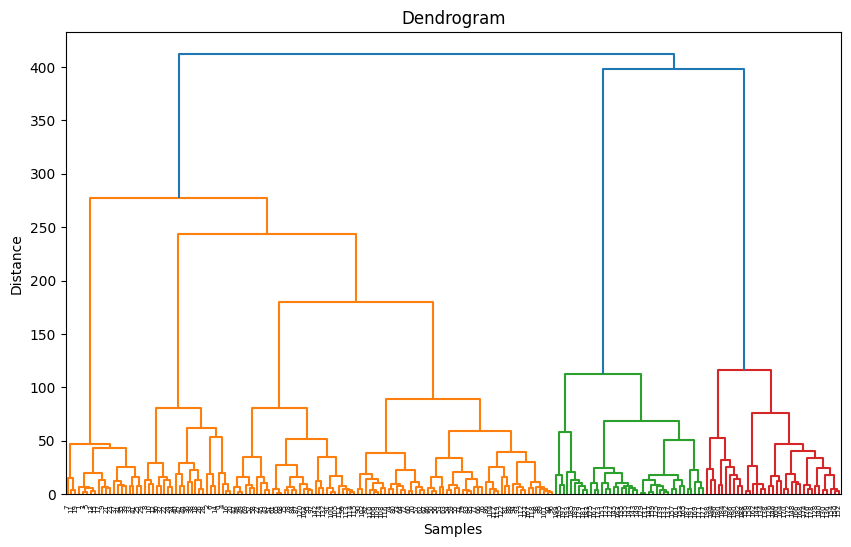

In [73]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [74]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(fashion)

In [76]:
fashion['Cluster'] = agg_labels

In [77]:
fashion.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


#Finally,
Save a copy in your Github. Remember renaming the notebook.